In [1]:
import keras
import tensorflow as tf

import os
tf.config.optimizer.set_jit(False)  # Desativa XLA

2024-09-24 16:51:31.087475: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 16:51:31.103233: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 16:51:31.109666: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 16:51:31.119203: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 16:51:31.994113: W tensorflow/compiler/tf2

In [2]:
from segmentandoDatasets import *

segmentando_datasets(10000,10000,10000)

DataFrame do local PUC salvo como: Datasets_csv/df_PUC.csv
DataFrame do local PUC:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
1  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
2  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
3  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
4  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty


DataFrame do local UFPR04 salvo como: Datasets_csv/df_UFPR04.csv
DataFrame do local UFPR04:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
1  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
2  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
3  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
4  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty


DataFrame do local UFPR05 salvo como: Datasets_csv/df_UFPR05.csv


In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from typing import List, Tuple
import os
import albumentations as A

from Preprocessamento import preprocessamento, preprocessamento_dataframe

In [4]:
csv_file = 'Datasets_csv/df_PUC.csv'
treino_gerador, validacao_gerador, teste_gerador, treino, validacao, teste = preprocessamento(csv_file, autoencoder=True)

Found 6000 validated image filenames.
Found 2000 validated image filenames.
Found 2000 validated image filenames.


In [5]:
from Modelos import GeradorAutoencoder

gerador = GeradorAutoencoder()
autoencoder = gerador.gerar_modelo()

autoencoder.summary()

encoder = autoencoder.get_layer('Encoder')
decoder = autoencoder.get_layer('Decoder')

encoder.summary()
decoder.summary()


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
I0000 00:00:1727207494.394015  181657 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727207494.433382  181657 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727207494.433604  181657 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at http

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Encoder (Sequential)            │ (None, 2, 2, 32)       │       158,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Sequential)            │ (None, 64, 64, 3)      │       161,543 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,927 (1.22 MB)

 Trainable params: 319,927 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

Model: "Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 16)     │        51,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 32)       │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,384 (618.69 KB)

 Trainable params: 158,384 (618.69 KB)

 Non-trainable params: 0 (0.00 B)

Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose_4              │ (None, 4, 4, 32)       │        25,632 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 8, 8, 64)       │        18,496 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 16, 16, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 32, 32, 16)     │        25,616 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 64, 64, 128)    │        51,328 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 64, 64, 3)      │         3,459 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_10             │ (None, 64, 64, 3)      │            84 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 64, 64, 3)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,543 (631.03 KB)

 Trainable params: 161,543 (631.03 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
autoencoder.compile(loss="mse", optimizer='adam')

In [7]:
# Verifique a forma da saída do autoencoder
output_shape = autoencoder.output_shape
print(f"Forma de saída do autoencoder: {output_shape}")  # Deve ser (None, 64, 64, 3)


Forma de saída do autoencoder: (None, 64, 64, 3)


In [8]:
history = autoencoder.fit(treino_gerador, epochs=10, batch_size=16, validation_data=(validacao_gerador))

Epoch 1/10


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727207499.156604  181722 service.cc:146] XLA service 0x798294015fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727207499.156623  181722 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
2024-09-24 16:51:39.211236: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-24 16:51:39.491091: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-0

  4/188 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0669

I0000 00:00:1727207503.961266  181722 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0520

2024-09-24 16:52:04.498644: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 536.04MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-09-24 16:52:04.657183: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 416.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


188/188 ━━━━━━━━━━━━━━━━━━━━ 35s 143ms/step - loss: 0.0520 - val_loss: 0.0201
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0189 - val_loss: 0.0137
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0130 - val_loss: 0.0118
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0115 - val_loss: 0.0102
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0104 - val_loss: 0.0095
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0093 - val_loss: 0.0089
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0079 - val_loss: 0.0079


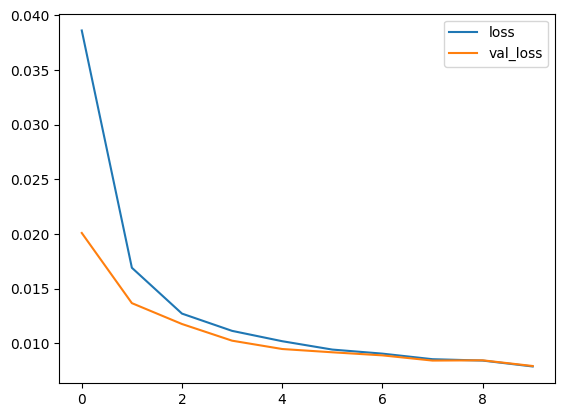

In [9]:
pd.DataFrame(history.history).plot()
autoencoder.save("Modelos_keras/Autoencoder_teste.keras")
autoencoder.save_weights("weights_finais/Autoencoder_teste.weights.h5")

In [10]:
autoencoder.load_weights("weights_finais/Autoencoder_teste.weights.h5")

In [11]:
print(len(treino_gerador))

188


In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_autoencoder(x_test, Autoencoder):
    def normalize(image):
        image = np.clip(image, 0, 1)  
        return (image - image.min()) / (image.max() - image.min()) if image.max() != image.min() else image

    plt.figure(figsize=(16, 8))

    for i in range(8):
        # Imagem original
        plt.subplot(2, 8, i + 1)
        plt.imshow(x_test[i])
        plt.title("Original")
        plt.axis("off")

        # Predição e normalização
        pred = Autoencoder.predict(x_test[i].reshape((1, 64, 64, 3)))
        pred_img = normalize(pred[0])

        plt.subplot(2, 8, i + 8 + 1)
        plt.imshow(pred_img)
        plt.title("Reconstruída")
        plt.axis("off")

    plt.show()


In [13]:
x_treino, y_treino = next(treino_gerador)

In [14]:
UFPR04, UFPR04_df = preprocessamento_dataframe('Datasets_csv/df_UFPR04.csv')
UFPR05, UFPR05_df = preprocessamento_dataframe('Datasets_csv/df_UFPR05.csv')

x_UFPR04, _ = next(UFPR04)
x_UFPR05, _ = next(UFPR05)

Found 10000 validated image filenames belonging to 2 classes.
Found 10000 validated image filenames belonging to 2 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


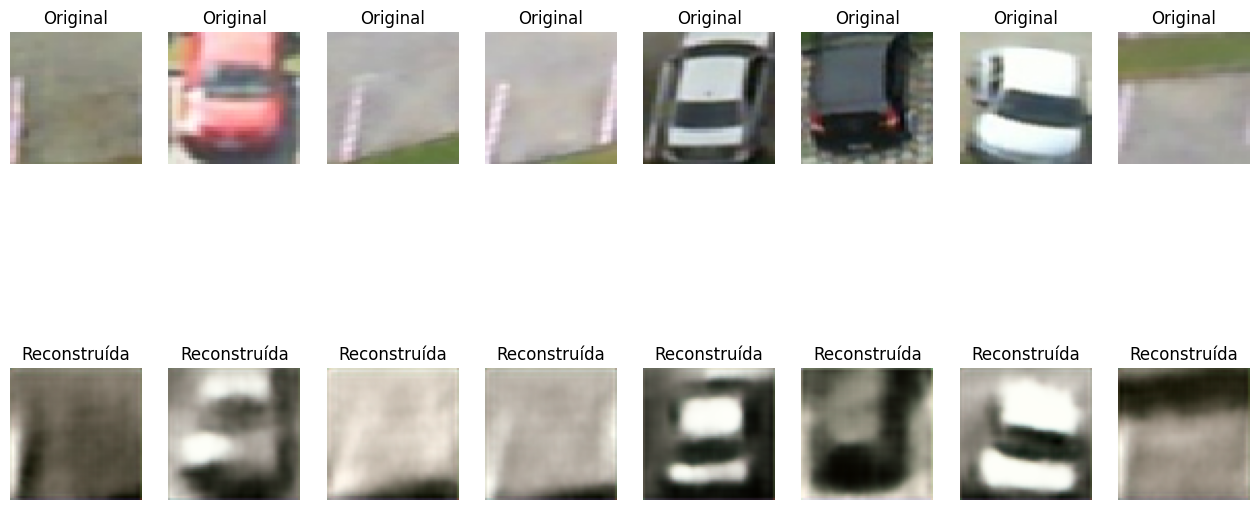

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


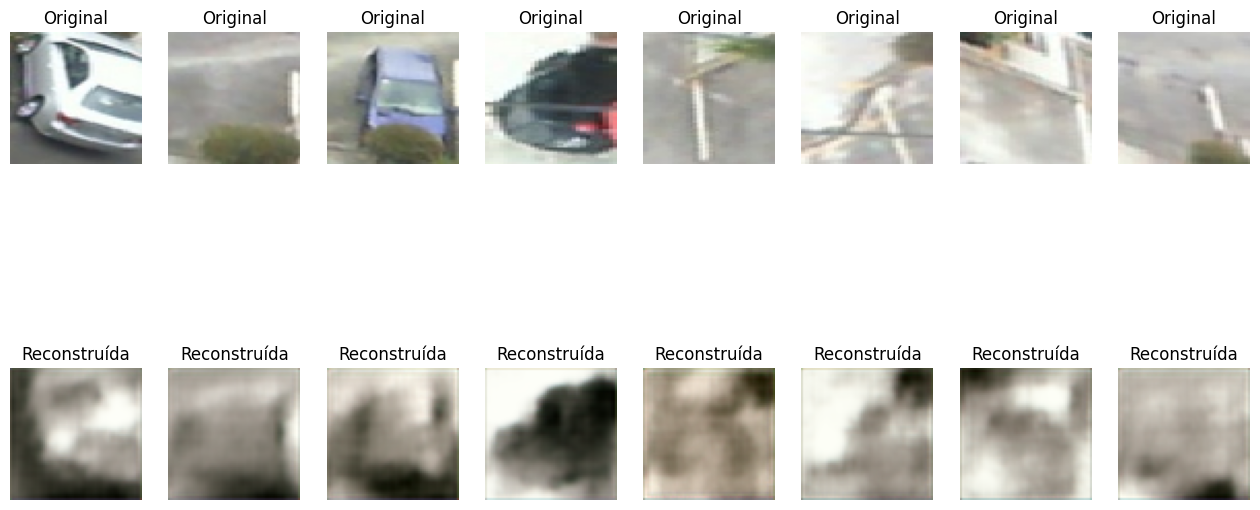

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


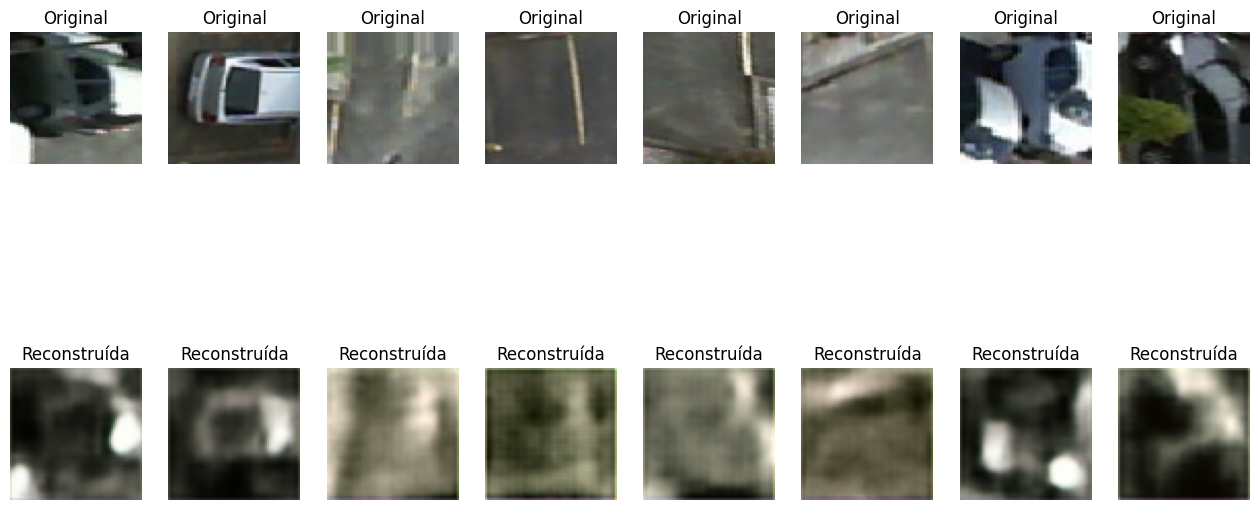

In [15]:
plot_autoencoder(x_treino, autoencoder)
plot_autoencoder(x_UFPR04, autoencoder)
plot_autoencoder(x_UFPR05, autoencoder)

In [16]:
from keras import layers, models
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

classifier = models.Sequential([
    encoder, 
    layers.Flatten(),  
    layers.Dropout(0.3),  
    layers.Dense(128, activation='relu'),  
    layers.Dense(2, activation='softmax')  
], name='classifier')

In [17]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
classifier.load_weights("weights_finais/Autoencoder_teste.weights.h5", skip_mismatch=True) #skip_mismatch para conseguir pegar os pesos do autoencoder

/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:591: UserWarning: A total of 2 objects could not be loaded. Example error message for object <Dense name=dense, built=True>:

Layer 'dense' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=dense, built=True>, <Dense name=dense_1, built=True>]
  warnings.warn(msg)


In [20]:
history = classifier.fit(treino_gerador, epochs=10, batch_size=16)

Epoch 1/10


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 64, 64, 3), output.shape=(None, 2)

In [21]:
classifier.save("/home/lucas/PIBIC (copy)/Modelos_keras/classifier_teste.keras")
classifier.save_weights("/home/lucas/PIBIC (copy)/Modelos_keras/classifier_teste.weights.h5")

In [22]:
pd.DataFrame(history.history).plot()

In [24]:
classifier.load_weights("/home/lucas/PIBIC (copy)/Modelos_keras/classifier_teste.weights.h5")

In [ ]:
predicoes = classifier.predict(teste_gerador)
predicoes = np.argmax(predicoes, axis=1)

In [26]:
from preprocessamento import mapear_rotulos_binarios

y_verdadeiro = mapear_rotulos_binarios(teste['classe'])

In [27]:
from visualizacao import plot_confusion_matrix

plot_confusion_matrix(y_verdadeiro, predicoes, ['Empty', 'Occupied'], "/home/lucas/PIBIC (copy)/Resultados/Matriz_de_confusao/Autoencoder/Autoencoder_PUC", 'PUC')

In [ ]:
predicoes_UFPR04 = classifier.predict(UFPR04)
predicoes_UFPR05 = classifier.predict(UFPR05)

predicoes_UFPR04 = np.argmax(predicoes_UFPR04, axis=1)
predicoes_UFPR05 = np.argmax(predicoes_UFPR05, axis=1)

y_UFPR04 = mapear_rotulos_binarios(UFPR04_df['classe'])
y_UFPR05 = mapear_rotulos_binarios(UFPR05_df['classe'])

plot_confusion_matrix(y_UFPR04, predicoes_UFPR04, ['Empty', 'Occupied'], "/home/lucas/PIBIC (copy)/Resultados/Matriz_de_confusao/Autoencoder/Autoencoder_UFPR04", 'UFPR04')
plot_confusion_matrix(y_UFPR05, predicoes_UFPR05, ['Empty', 'Occupied'], "/home/lucas/PIBIC (copy)/Resultados/Matriz_de_confusao/Autoencoder/Autoencoder_UFPR05", 'UFPR05')